In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image

In [ ]:
pic = "/content/flower.bmp"

**COMPRESS TO WEBP FORMAT**

---



In [ ]:
import time
t1 = time.perf_counter()
# Open the image file
image = Image.open(pic)

# Convert the image to WebP format with lossy compression and desired quality (0-100)
compressed = image.save("output.webp", "webp", lossless=False, quality=80)
t2 = time.perf_counter()
print('time taken to run:',t2-t1)


time taken to run: 0.3787382880000223


**EVALUATE COMPRESSION QUALITY**

---



In [ ]:
import skimage.metrics as metrics
import numpy as np

# Open the original and compressed images
original_image = Image.open(pic)
compressed_image = Image.open("output.webp")

# Convert images to NumPy arrays
original_array = np.array(original_image)
compressed_array = np.array(compressed_image)

# Calculate SSIM
ssim = metrics.structural_similarity(original_array, compressed_array, multichannel=True)

# Calculate PSNR
psnr = metrics.peak_signal_noise_ratio(original_array, compressed_array)

print(f"SSIM: {ssim:.4f}")
print(f"PSNR: {psnr:.2f} dB")



<ipython-input-87-aa0989776530>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = metrics.structural_similarity(original_array, compressed_array, multichannel=True)


SSIM: 0.9414
PSNR: 36.65 dB


In [ ]:
import os

# Get the file sizes
original_size = os.path.getsize(pic)
compressed_size = os.path.getsize("output.webp")

# Calculate the compression ratio
compression_ratio = original_size / compressed_size

print(f"Original Size: {original_size} bytes")
print(f"Compressed Size: {compressed_size} bytes")
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"Compressed bytes: {original_size - compressed_size} bytes")


Original Size: 5877782 bytes
Compressed Size: 65722 bytes
Compression Ratio: 89.43
Compressed bytes: 5812060 bytes


DECODE COMPRESSED **IMAGE**

---



In [ ]:
from PIL import Image
import time
t1 = time.perf_counter()
# Open the lossy WebP image file
image = Image.open("output.webp")

# Convert the image to a different format (e.g., JPEG)
image.save("decoded.bmp", "BMP")
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

time taken to run: 0.02969725999992079


**EVALUATE DECODED IMAGE QUALITY**

---



In [ ]:
decoded_size = os.path.getsize("decoded.bmp")
print(f"Decoded Size: {decoded_size} bytes")
print(f"Loss Data: {original_size - decoded_size} bytes")

Decoded Size: 3275574 bytes
Loss Data: 2 bytes


**VISUALIZE ORIGINAL, COMPRESSED AND DECODED IMAGES**

---



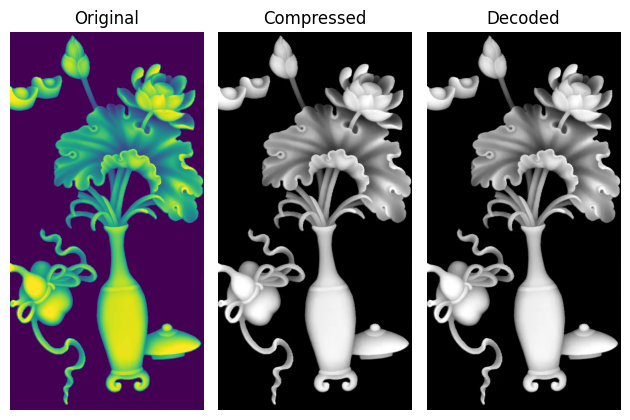

In [ ]:
import matplotlib.pyplot as plt

# Open the original, compressed, and decoded images
original_image = Image.open(pic)
compressed_image = Image.open("output.webp")
decoded_image = Image.open("decoded.bmp")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3)

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title("Original")

# Display the compressed image
axes[1].imshow(compressed_image)
axes[1].set_title("Compressed")

# Display the decoded image
axes[2].imshow(decoded_image)
axes[2].set_title("Decoded")

# Remove the axis labels
for ax in axes:
    ax.axis("off")

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()
